# 모든 데이터에 대해서 heatmap을 만들자
- numeric한 칼럼들 제외
- categorical 칼럼들 그대로 두고 일단 진행해보자

특별기능
- 계수값이 0.4이상인 값들만 보고 싶어요
- mask를 만들어주세요

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [44]:
df = pd.read_csv("../nationalhealth_2010to2021.csv")
m_data = pd.read_excel("../pandapear/data/meta_data20.xlsx")
df_20 = pd.read_csv("../national_only20_health_2010to2021.csv")

def trans(val): #변수 번역 input str
        return m_data["variable description"][m_data["variable"] == val].values[0]

def disc(val): #설문 내역
        return m_data["option description"][m_data["variable"] == val].values[0]
        
def change2None(data): #통계량을 측정할 때, 결측값 복원
    for i in data.columns:
        data.replace({i:{-1:None}},inplace = True)
        data.replace({i:{-2:None}},inplace = True)
    return data


#타겟 + 피쳐 str list
col_li = df.columns.to_list() 
#타겟 str list
target_li = df.columns[-13:].to_list()
#피쳐 str list
fea_li = df.columns[:-13].to_list()

#범주형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "category"].values)
cat_li = [i for i in temp if i in col_li] #범주형 자료 컬럼 : cat_li
#연속형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "numeric"].values)
expcept = ['ID', 'ID_fam', 'LW_mt_a1', 'age', 'year']
num_li = [i for i in temp if i in col_li] #연속형 자료 컬럼 : num_li

## numeric변수 구분

In [45]:
df_20to80 = pd.concat([df,df_20], ignore_index=True)

In [46]:
Target = df_20to80.columns[-13:].to_list()
Target

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [102]:
len(Target)

13

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
26,b'A320599801',b'A3205998',2010.0,1.0,1.0,1.0,42.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
40,b'A332699801',b'A3326998',2010.0,1.0,1.0,1.0,45.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50,b'A336359801',b'A3363598',2010.0,1.0,1.0,1.0,43.0,1.0,2.0,1.0,...,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
55,b'A337519801',b'A3375198',2010.0,1.0,1.0,1.0,41.0,2.0,3.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
70,b'B308040201',b'B3080402',2010.0,2.0,1.0,1.0,49.0,3.0,3.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,b'R903228903',b'R9032289',2021.0,8.0,2.0,2.0,48.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35616,b'R904234001',b'R9042340',2021.0,8.0,2.0,1.0,40.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35621,b'R904310501',b'R9043105',2021.0,8.0,2.0,1.0,47.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35627,b'R904353001',b'R9043530',2021.0,8.0,2.0,1.0,45.0,3.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

In [48]:
bin_col = [i for i in col_li if len(df[i].unique()) < 4]
len(set(cat_li) - set(bin_col))


38

In [49]:
cat_minus_bin_li = list(set(cat_li) - set(bin_col))

In [50]:
corr = df_20to80[cat_minus_bin_li + Target].corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr = corr[((corr['value'] > 0.4)&(corr['value'] < 0.99))|((corr['value'] < -0.4)&(corr['value'] > -0.99))]

In [51]:
corr


,index,variable,value
122,EC_wht_5,occp,-0.520996
161,BS3_1,LW_mt,-0.563149
164,BD2_31,LW_mt,-0.463588
174,LW_br,LW_mt,0.928125
214,HE_STRfh3,HE_HPfh3,0.716528
...,...,...,...
2595,뇌졸중,우울증,0.691698
2596,협심증또는심근경색증,우울증,0.666905
2597,천식,우울증,0.663804
2598,아토피피부염,우울증,0.678854


In [52]:
be_there_li = []
no_there_li = []

for ind in corr['index'].unique():
    if ind in corr['variable'].unique() :
        be_there_li.append(ind)
    else :
        no_there_li.append(ind)
print('be_there_li : ', be_there_li, len(be_there_li), '\n')
print('no_there_li : ', no_there_li, len(no_there_li))

be_there_li :  ['EC_wht_5', 'BS3_1', 'BD2_31', 'LW_br', 'HE_STRfh3', 'HE_IHDfh3', 'HE_DMfh3', 'HE_HLfh3', 'LW_mt', 'HE_HPfh3', 'BD2_1', 'BD1_11', 'incm5', 'ho_incm', 'ho_incm5', 'cfam', 'genertn', 'occp', 'EC_pedu_1', 'edu', 'educ', 'EC_pedu_2', 'incm', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증', '뇌졸중'] 29 

no_there_li :  [] 0


In [53]:
##ind2int
ind_dic = {}
for ii, ind in enumerate(set(corr['index'])):
    ind_dic[ind] = ii
ind_dic

{'occp': 0,
 'LW_mt': 1,
 '아토피피부염': 2,
 'HE_HPfh3': 3,
 '골관절염': 4,
 'BS3_1': 5,
 'HE_STRfh3': 6,
 'BD2_31': 7,
 '우울증': 8,
 'genertn': 9,
 'incm': 10,
 'cfam': 11,
 'HE_IHDfh3': 12,
 'HE_DMfh3': 13,
 'EC_wht_5': 14,
 'LW_br': 15,
 'EC_pedu_2': 16,
 'EC_pedu_1': 17,
 'BD2_1': 18,
 'incm5': 19,
 '뇌졸중': 20,
 'ho_incm': 21,
 'ho_incm5': 22,
 '협심증또는심근경색증': 23,
 'HE_HLfh3': 24,
 'edu': 25,
 'BD1_11': 26,
 '천식': 27,
 'educ': 28}

In [54]:
print(ind_dic.keys())
print(ind_dic.values())

dict_keys(['occp', 'LW_mt', '아토피피부염', 'HE_HPfh3', '골관절염', 'BS3_1', 'HE_STRfh3', 'BD2_31', '우울증', 'genertn', 'incm', 'cfam', 'HE_IHDfh3', 'HE_DMfh3', 'EC_wht_5', 'LW_br', 'EC_pedu_2', 'EC_pedu_1', 'BD2_1', 'incm5', '뇌졸중', 'ho_incm', 'ho_incm5', '협심증또는심근경색증', 'HE_HLfh3', 'edu', 'BD1_11', '천식', 'educ'])
dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])


In [55]:
corr['index2values'] = corr['index'].map(ind_dic)
corr['variable2values'] = corr['variable'].map(ind_dic)

In [56]:
corr

,index,variable,value,index2values,variable2values
122,EC_wht_5,occp,-0.520996,14,0
161,BS3_1,LW_mt,-0.563149,5,1
164,BD2_31,LW_mt,-0.463588,7,1
174,LW_br,LW_mt,0.928125,15,1
214,HE_STRfh3,HE_HPfh3,0.716528,6,3
...,...,...,...,...,...
2595,뇌졸중,우울증,0.691698,20,8
2596,협심증또는심근경색증,우울증,0.666905,23,8
2597,천식,우울증,0.663804,27,8
2598,아토피피부염,우울증,0.678854,2,8


## heatmap완성본
- 상관계수가 0.4이상, 1제외
- 크기와 색깔에 상관계수 값 정보가 들어있음.

C:\Users\jihoo\Anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\jihoo\Anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\jihoo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


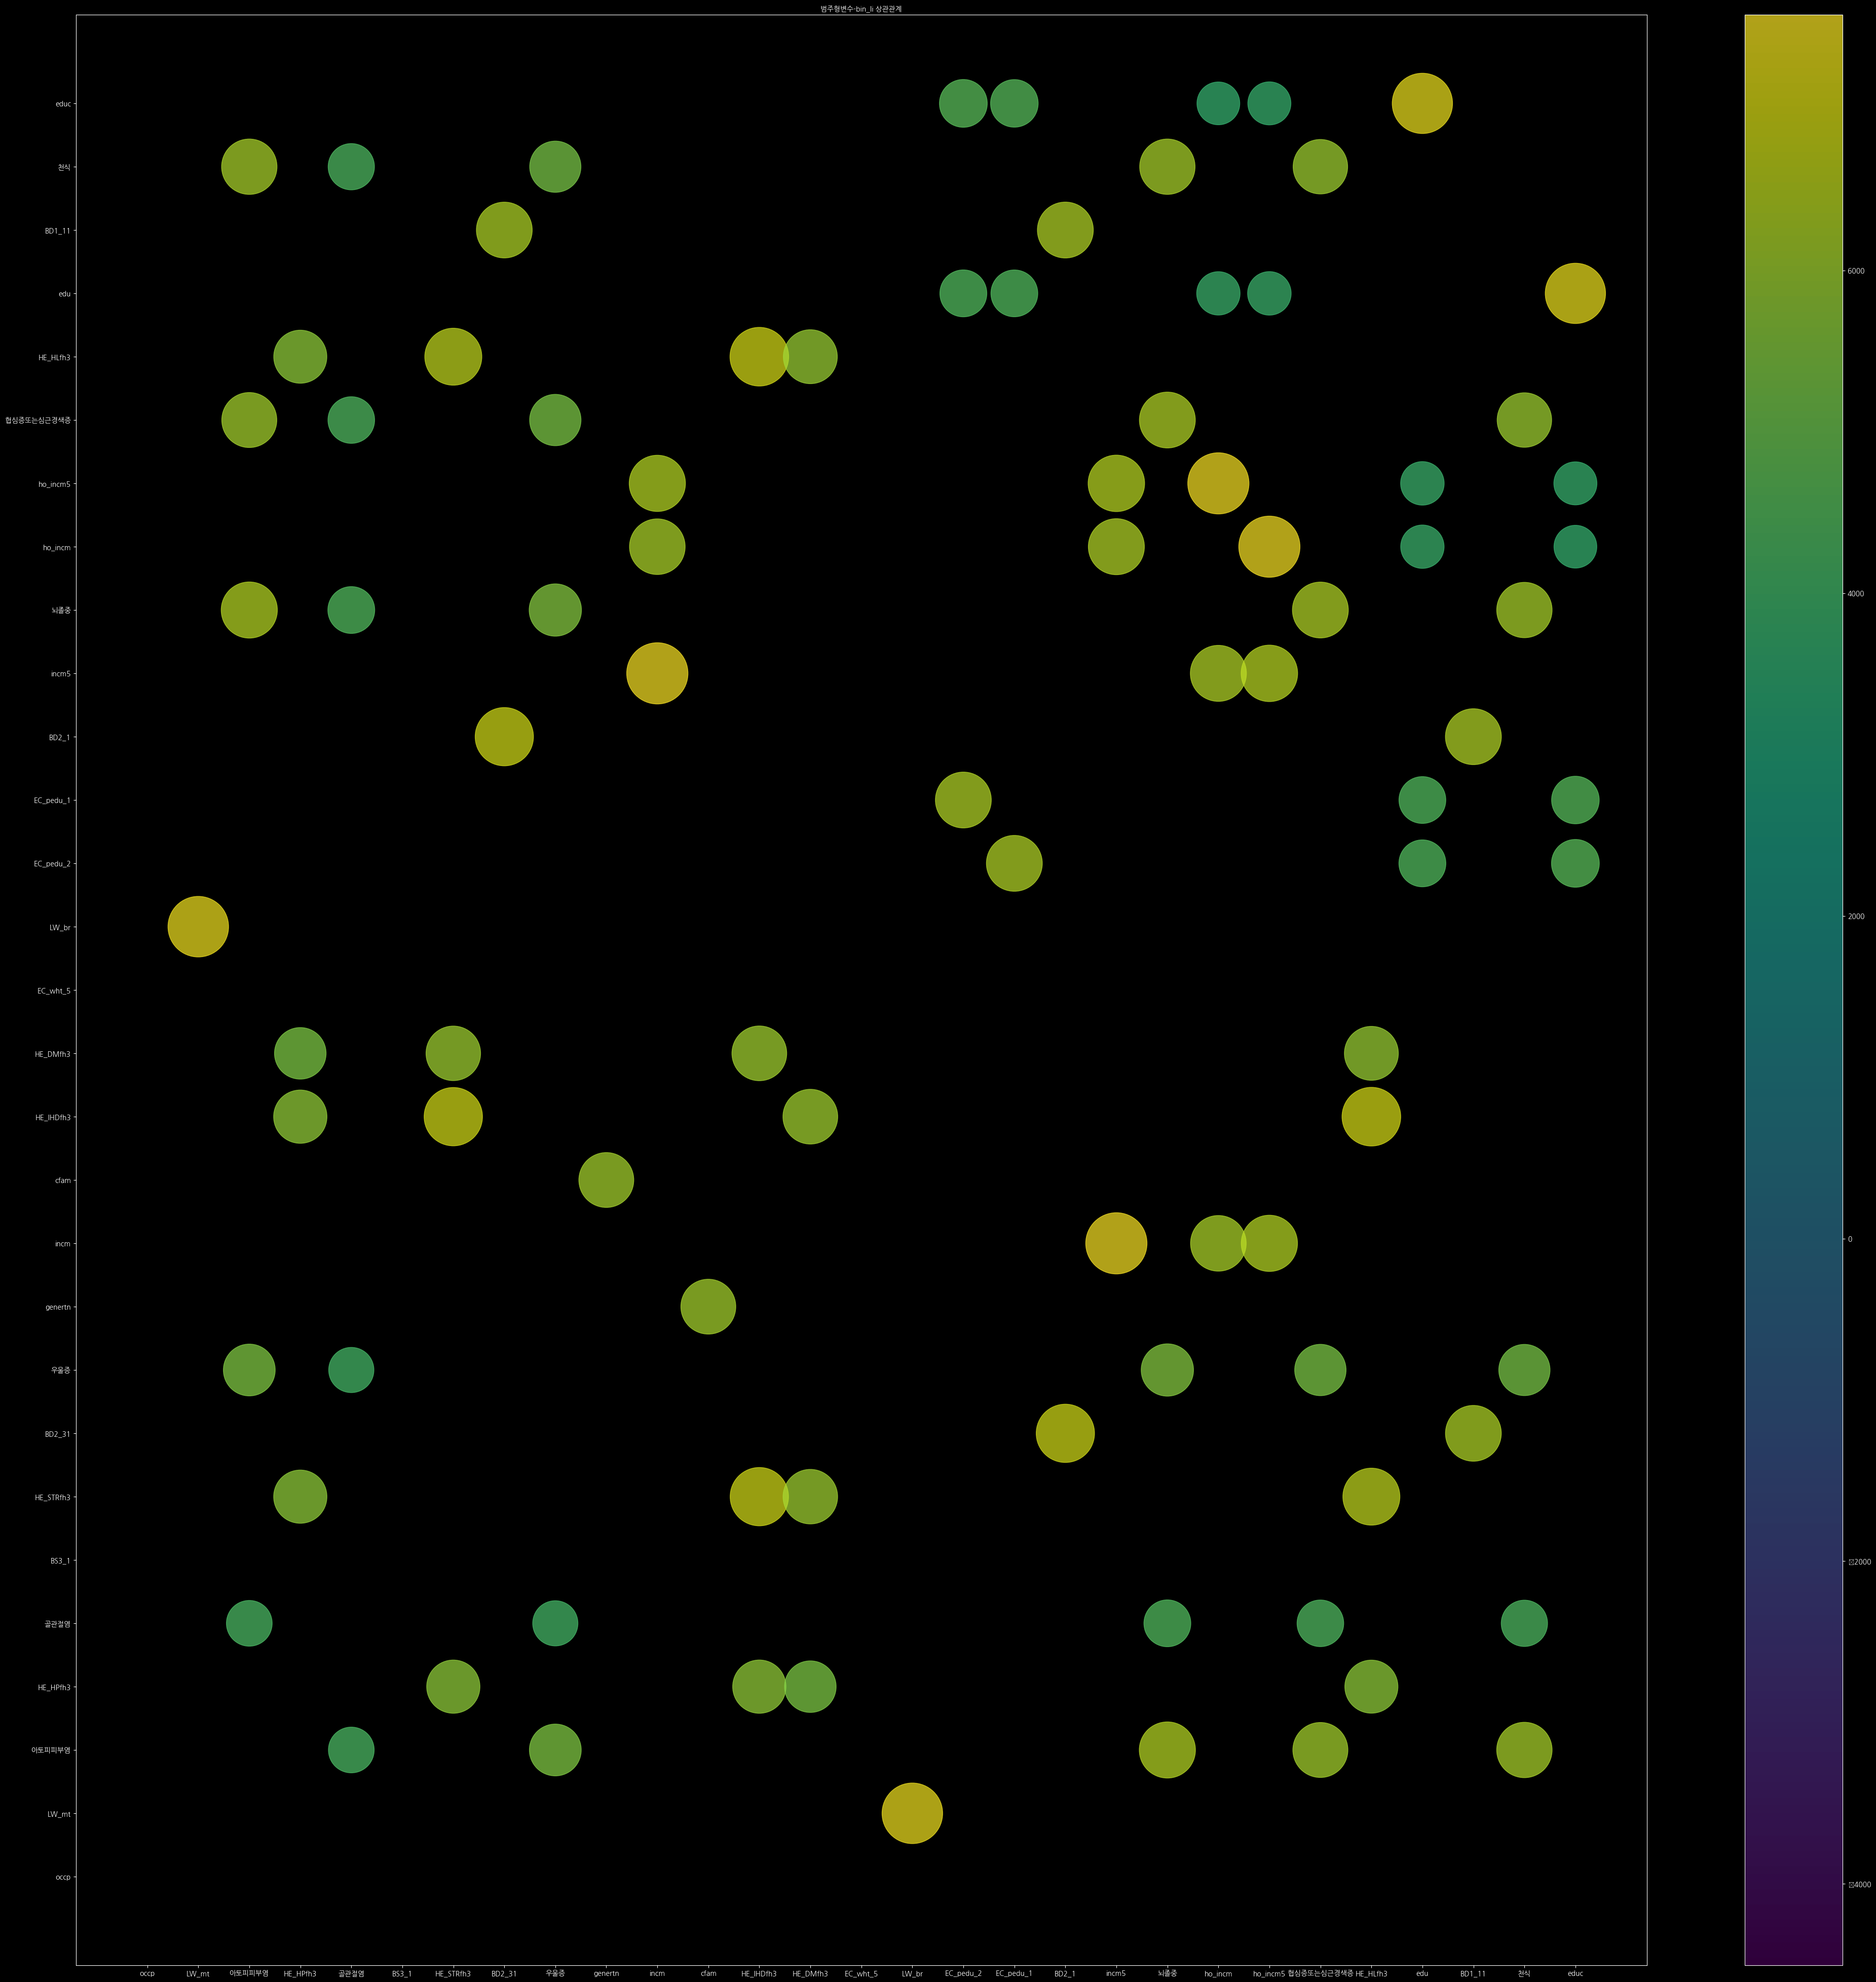

In [57]:

fig = plt.figure(figsize=(50,50))

x = corr['index2values'].values
y = corr['variable2values'].values
size = corr['value'].values*1000
plt.scatter(x, y, # y
           alpha=0.7, 
           s=size*8, # marker size
           c=size*8, # marker color
           cmap='viridis')
plt.style.use("dark_background")
plt.title('범주형변수-bin_li 상관관계', fontsize=10)
plt.xticks(np.arange(len(set(x))),ind_dic.keys())
plt.yticks(np.arange(len(set(x))),ind_dic.keys())
plt.colorbar()
plt.show()

In [58]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

## 위 heatmap의 데이터프레임 만들기

데이터프레임
- 계수값이 0.4이상 1이하
- index와 variable 한국말 버전 칼럼 만들기
- value값을 기준으로 내림차순

In [59]:
corr

,index,variable,value,index2values,variable2values
122,EC_wht_5,occp,-0.520996,14,0
161,BS3_1,LW_mt,-0.563149,5,1
164,BD2_31,LW_mt,-0.463588,7,1
174,LW_br,LW_mt,0.928125,15,1
214,HE_STRfh3,HE_HPfh3,0.716528,6,3
...,...,...,...,...,...
2595,뇌졸중,우울증,0.691698,20,8
2596,협심증또는심근경색증,우울증,0.666905,23,8
2597,천식,우울증,0.663804,27,8
2598,아토피피부염,우울증,0.678854,2,8


In [60]:

##번역된 변수 칼럼 만들기 
trans_index_li = []
for ii in corr['index'].values:
    try :
        translate_in = trans(ii)
        trans_index_li.append(translate_in)
    except :
        trans_index_li.append(ii)
        
trans_variable_li = []
for jj in corr['variable'].values:
    try :
        translate_va = trans(jj)
        trans_variable_li.append(translate_va)
    except :
        trans_variable_li.append(jj)

corr['index_trans'] = trans_index_li
corr['variable_trans'] = trans_variable_li

In [61]:
corr = corr[['index','variable', 'index_trans', 'variable_trans', 'index2values', 'variable2values', 'value']]

In [62]:
corr.reset_index(drop=True, inplace=True)

In [63]:
corr

,index,variable,index_trans,variable_trans,index2values,variable2values,value
0,EC_wht_5,occp,변형근로시간,직업재분류 및 실업/비경제활동 상태 코드,14,0,-0.520996
1,BS3_1,LW_mt,(성인) 현재 일반담배(궐련) 흡연 여부,(만15세이상) 출산경험,5,1,-0.563149
2,BD2_31,LW_mt,(만12세이상) 폭음 빈도,(만15세이상) 출산경험,7,1,-0.463588
3,LW_br,LW_mt,모유수유 경험 여부,(만15세이상) 출산경험,15,1,0.928125
4,HE_STRfh3,HE_HPfh3,뇌졸중 의사진단 여부(형제자매),고혈압 의사진단 여부(형제자매),6,3,0.716528
...,...,...,...,...,...,...,...
97,뇌졸중,우울증,뇌졸중,우울증,20,8,0.691698
98,협심증또는심근경색증,우울증,협심증또는심근경색증,우울증,23,8,0.666905
99,천식,우울증,천식,우울증,27,8,0.663804
100,아토피피부염,우울증,아토피피부염,우울증,2,8,0.678854


In [64]:
##value기준으로 내림차순
corr = corr.sort_values(by=['value'], ascending=False)
corr.reset_index(drop=True, inplace=True)
corr

,index,variable,index_trans,variable_trans,index2values,variable2values,value
0,incm5,incm,소득 5분위수(개인),소득 4분위수(개인),19,10,0.948330
1,incm,incm5,소득 4분위수(개인),소득 5분위수(개인),10,19,0.948330
2,ho_incm,ho_incm5,소득 4분위수(가구),소득 5분위수(가구),21,22,0.947029
3,ho_incm5,ho_incm,소득 5분위수(가구),소득 4분위수(가구),22,21,0.947029
4,LW_br,LW_mt,모유수유 경험 여부,(만15세이상) 출산경험,15,1,0.928125
...,...,...,...,...,...,...,...
97,EC_wht_5,occp,변형근로시간,직업재분류 및 실업/비경제활동 상태 코드,14,0,-0.520996
98,BS3_1,LW_br,(성인) 현재 일반담배(궐련) 흡연 여부,모유수유 경험 여부,5,15,-0.537461
99,LW_br,BS3_1,모유수유 경험 여부,(성인) 현재 일반담배(궐련) 흡연 여부,15,5,-0.537461
100,BS3_1,LW_mt,(성인) 현재 일반담배(궐련) 흡연 여부,(만15세이상) 출산경험,5,1,-0.563149


In [65]:
## (index, variable) (vairable, index)중복된 값들 제거
corr[['index', 'variable']].values


dic_indva = {}
indva = []
for ii, (ind, va) in enumerate(corr[['index', 'variable']].values):
    if ii == 0:
        indva.append((ind,va))
        dic_indva[ii] = (ind, va)
    else :
        if (va,ind) in indva :
            pass 
        else :
            indva.append((ind,va))
            dic_indva[ii] = (ind,va)
print(indva, len(indva))


[('incm5', 'incm'), ('ho_incm', 'ho_incm5'), ('LW_br', 'LW_mt'), ('educ', 'edu'), ('HE_IHDfh3', 'HE_HLfh3'), ('HE_IHDfh3', 'HE_STRfh3'), ('BD2_1', 'BD2_31'), ('HE_STRfh3', 'HE_HLfh3'), ('incm5', 'ho_incm5'), ('ho_incm5', 'incm'), ('뇌졸중', '아토피피부염'), ('ho_incm', 'incm5'), ('BD2_1', 'BD1_11'), ('협심증또는심근경색증', '뇌졸중'), ('EC_pedu_2', 'EC_pedu_1'), ('BD2_31', 'BD1_11'), ('incm', 'ho_incm'), ('아토피피부염', '천식'), ('천식', '뇌졸중'), ('아토피피부염', '협심증또는심근경색증'), ('genertn', 'cfam'), ('HE_DMfh3', 'HE_IHDfh3'), ('HE_STRfh3', 'HE_DMfh3'), ('협심증또는심근경색증', '천식'), ('HE_DMfh3', 'HE_HLfh3'), ('HE_HPfh3', 'HE_IHDfh3'), ('HE_STRfh3', 'HE_HPfh3'), ('HE_HLfh3', 'HE_HPfh3'), ('뇌졸중', '우울증'), ('아토피피부염', '우울증'), ('HE_DMfh3', 'HE_HPfh3'), ('협심증또는심근경색증', '우울증'), ('천식', '우울증'), ('EC_pedu_2', 'educ'), ('educ', 'EC_pedu_1'), ('EC_pedu_2', 'edu'), ('골관절염', '뇌졸중'), ('EC_pedu_1', 'edu'), ('협심증또는심근경색증', '골관절염'), ('골관절염', '천식'), ('아토피피부염', '골관절염'), ('우울증', '골관절염'), ('ho_incm5', 'edu'), ('ho_incm', 'edu'), ('ho_incm5', 'educ'), ('ho_i

In [66]:
corr = corr.iloc[list(dic_indva.keys())]
corr.reset_index(drop=True, inplace=True)
corr

,index,variable,index_trans,variable_trans,index2values,variable2values,value
0,incm5,incm,소득 5분위수(개인),소득 4분위수(개인),19,10,0.948330
1,ho_incm,ho_incm5,소득 4분위수(가구),소득 5분위수(가구),21,22,0.947029
2,LW_br,LW_mt,모유수유 경험 여부,(만15세이상) 출산경험,15,1,0.928125
3,educ,edu,교육수준: 학력,교육수준 재분류 코드,28,25,0.919364
4,HE_IHDfh3,HE_HLfh3,허혈성심장질환 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),12,24,0.870832
5,HE_IHDfh3,HE_STRfh3,허혈성심장질환 의사진단 여부(형제자매),뇌졸중 의사진단 여부(형제자매),12,6,0.860333
6,BD2_1,BD2_31,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 폭음 빈도,18,7,0.859178
7,HE_STRfh3,HE_HLfh3,뇌졸중 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),6,24,0.821643
8,incm5,ho_incm5,소득 5분위수(개인),소득 5분위수(가구),19,22,0.806367
9,ho_incm5,incm,소득 5분위수(가구),소득 4분위수(개인),22,10,0.799861


In [67]:
##저장
#corr.to_csv('../with_negative_score.csv')

## 직감적으로 의미있는 관계들 뽑기
- with_negative_score.csv
    - 하나하나 직접 읽고 의미없는거 제외하기 
    - important_index = [4,7,10,13,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,39,40,41,42,46,47,48,49]

In [68]:
important_index = [4,7,10,13,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,39,40,41,42,46,47,48,49]
print(len(corr.iloc[important_index]))

30


In [69]:
corr.iloc[important_index]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
4,HE_IHDfh3,HE_HLfh3,허혈성심장질환 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),12,24,0.870832
7,HE_STRfh3,HE_HLfh3,뇌졸중 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),6,24,0.821643
10,뇌졸중,아토피피부염,뇌졸중,아토피피부염,20,2,0.797184
13,협심증또는심근경색증,뇌졸중,협심증또는심근경색증,뇌졸중,23,20,0.789677
17,아토피피부염,천식,아토피피부염,천식,2,27,0.775550
18,천식,뇌졸중,천식,뇌졸중,27,20,0.774817
19,아토피피부염,협심증또는심근경색증,아토피피부염,협심증또는심근경색증,2,23,0.765281
20,genertn,cfam,가구 세대구성코드,가구원수,9,11,0.761711
21,HE_DMfh3,HE_IHDfh3,당뇨병 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),13,12,0.758486
22,HE_STRfh3,HE_DMfh3,뇌졸중 의사진단 여부(형제자매),당뇨병 의사진단 여부(형제자매),6,13,0.752624


# 새로운 task : 새로운10개변수 포함되어있는것들만 뽑자

## 새로운 변수들 10개

시도1            
- edu       0.082388             교육수준 재분류 코드       4
- occp      0.033648  직업재분류 및 실업/비경제활동 상태 코드       7
- region    0.023384                  17개 시도      17
- sex       0.022988                      성별       2
- cfam      0.022829                    가구원수       6
- ho_incm   0.017152             소득 4분위수(가구)       4
- ho_incm5  0.016469             소득 5분위수(가구)       5
- incm5     0.012329             소득 5분위수(개인)       5
- incm      0.011699             소득 4분위수(개인)       4
- town_t    0.005776                 동/읍면 구분       2

시도
- BD1_11     0.056553       (만12세이상) 1년간 음주빈도       7
- BD2_1      0.036119   (만12세이상) 한 번에 마시는 음주량       7
- BS3_1      0.022957  (성인) 현재 일반담배(궐련) 흡연 여부       5
- BP7        0.022170             1년간 정신문제 상담       4
- incm5      0.019225             소득 5분위수(개인)       5
- HE_Ubld    0.016473                     요잠혈       6
- LW_br      0.014483              모유수유 경험 여부       4
- HE_DMfh3   0.011815       당뇨병 의사진단 여부(형제자매)       4
- HE_HLfh3   0.006513      고지혈증 의사진단 여부(형제자매)       4
- HE_IHDfh3  0.005887   허혈성심장질환 의사진단 여부(형제자매)       4

In [98]:
disc('incm')

'1 : 하 | 2 : 중하 | 3 : 중상 | 4 : 상 |'

In [70]:
corr

,index,variable,index_trans,variable_trans,index2values,variable2values,value
0,incm5,incm,소득 5분위수(개인),소득 4분위수(개인),19,10,0.948330
1,ho_incm,ho_incm5,소득 4분위수(가구),소득 5분위수(가구),21,22,0.947029
2,LW_br,LW_mt,모유수유 경험 여부,(만15세이상) 출산경험,15,1,0.928125
3,educ,edu,교육수준: 학력,교육수준 재분류 코드,28,25,0.919364
4,HE_IHDfh3,HE_HLfh3,허혈성심장질환 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),12,24,0.870832
5,HE_IHDfh3,HE_STRfh3,허혈성심장질환 의사진단 여부(형제자매),뇌졸중 의사진단 여부(형제자매),12,6,0.860333
6,BD2_1,BD2_31,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 폭음 빈도,18,7,0.859178
7,HE_STRfh3,HE_HLfh3,뇌졸중 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),6,24,0.821643
8,incm5,ho_incm5,소득 5분위수(개인),소득 5분위수(가구),19,22,0.806367
9,ho_incm5,incm,소득 5분위수(가구),소득 4분위수(개인),22,10,0.799861


1. wosun_li = ['edu', 'occp', 'region', 'sex', 'cfam', 'ho_incm', 'ho_incm5', 'incm5', 'incm', 'town_t']

In [84]:
wosun_li = ['BD1_11', 'BD2_1', 'BS3_1', 'BP7', 'incm5', 'HE_Ubld', 'LW_br', 'HE_DMfh3', 'HE_HLfh3', 'HE_IHDfh3']

In [85]:
corr.loc[1, 'index']

'ho_incm'

In [88]:
'edu' in wosun_li 

False

### 변수10개 index에 있는거 

In [89]:
include_ind = []
for ii in range(len(corr)):
    if corr.loc[ii, 'index'] in wosun_li : 
        include_ind.append(ii)
include_ind

[0, 2, 4, 5, 6, 8, 12, 21, 24, 27, 30, 46, 49, 50]

In [90]:
corr.iloc[include_ind]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
0,incm5,incm,소득 5분위수(개인),소득 4분위수(개인),19,10,0.948330
2,LW_br,LW_mt,모유수유 경험 여부,(만15세이상) 출산경험,15,1,0.928125
4,HE_IHDfh3,HE_HLfh3,허혈성심장질환 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),12,24,0.870832
5,HE_IHDfh3,HE_STRfh3,허혈성심장질환 의사진단 여부(형제자매),뇌졸중 의사진단 여부(형제자매),12,6,0.860333
6,BD2_1,BD2_31,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 폭음 빈도,18,7,0.859178
8,incm5,ho_incm5,소득 5분위수(개인),소득 5분위수(가구),19,22,0.806367
12,BD2_1,BD1_11,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 1년간 음주빈도,18,26,0.790703
21,HE_DMfh3,HE_IHDfh3,당뇨병 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),13,12,0.758486
24,HE_DMfh3,HE_HLfh3,당뇨병 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),13,24,0.736230
27,HE_HLfh3,HE_HPfh3,고지혈증 의사진단 여부(형제자매),고혈압 의사진단 여부(형제자매),24,3,0.712400


### 변수10개 variable에 있는거 

In [91]:
include_variable = []
for ii in range(len(corr)):
    if corr.loc[ii, 'variable'] in wosun_li:
        include_variable.append(ii)
include_variable

[4, 7, 11, 12, 15, 21, 22, 24, 25, 49]

In [118]:
def print_대답(f1, f2):
    print(f1,trans(f1),':')
    print(disc(f1))
    print(df[f1].value_counts(), '\n')
    print(f2,trans(f2),':')
    print(disc(f2))
    print(df[f2].value_counts())
    
print_대답('BD2_1','BD1_11')

BD2_1 (만12세이상) 한 번에 마시는 음주량 :
1 : 1-2잔 | 2 : 3-4잔 | 3 : 5-6잔  | 4 : 7-9잔 | 5 : 10잔 이상 | 8 : 비해당(문항2-1-①⑧) | 9 : 모름, 무응답 |
-1.0    11509
 1.0    10350
 2.0     5361
 3.0     3211
 4.0     2953
 5.0     2244
-2.0        1
Name: BD2_1, dtype: int64 

BD1_11 (만12세이상) 1년간 음주빈도 :
1 : 최근 1년간 전혀 마시지 않았다 | 2 : 월1회미만 | 3 : 월1회정도 | 4 : 월2-4회  | 5 : 주2-3회정도 | 6 : 주4회이상 | 8 : 비해당(문항1-m⑧) | 9 : 모름, 무응답 |
 4.0    6940
 2.0    6675
 1.0    6582
-1.0    4927
 5.0    4825
 3.0    3341
 6.0    2339
Name: BD1_11, dtype: int64


In [92]:
corr.iloc[include_variable]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
4,HE_IHDfh3,HE_HLfh3,허혈성심장질환 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),12,24,0.870832
7,HE_STRfh3,HE_HLfh3,뇌졸중 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),6,24,0.821643
11,ho_incm,incm5,소득 4분위수(가구),소득 5분위수(개인),21,19,0.794133
12,BD2_1,BD1_11,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 1년간 음주빈도,18,26,0.790703
15,BD2_31,BD1_11,(만12세이상) 폭음 빈도,(만12세이상) 1년간 음주빈도,7,26,0.787558
21,HE_DMfh3,HE_IHDfh3,당뇨병 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),13,12,0.758486
22,HE_STRfh3,HE_DMfh3,뇌졸중 의사진단 여부(형제자매),당뇨병 의사진단 여부(형제자매),6,13,0.752624
24,HE_DMfh3,HE_HLfh3,당뇨병 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),13,24,0.736230
25,HE_HPfh3,HE_IHDfh3,고혈압 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),3,12,0.718298
49,BS3_1,LW_br,(성인) 현재 일반담배(궐련) 흡연 여부,모유수유 경험 여부,5,15,-0.537461


In [93]:
print(df["뇌졸중"].value_counts())
print(df["아토피피부염"].value_counts())

 0.0    27541
-1.0     7143
 1.0      945
Name: 뇌졸중, dtype: int64
 0.0    27923
-1.0     7099
 1.0      607
Name: 아토피피부염, dtype: int64


### 변수10개 index,variable둘다에 있는거 

In [94]:
include_ind_variable = []
for ii in range(len(corr)):
    if corr.loc[ii, 'index'] in wosun_li : 
        if corr.loc[ii, 'variable'] in wosun_li:
            include_ind_variable.append(ii)
include_ind_variable

[4, 12, 21, 24, 49]

In [95]:
corr.iloc[include_ind_variable]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
4,HE_IHDfh3,HE_HLfh3,허혈성심장질환 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),12,24,0.870832
12,BD2_1,BD1_11,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 1년간 음주빈도,18,26,0.790703
21,HE_DMfh3,HE_IHDfh3,당뇨병 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),13,12,0.758486
24,HE_DMfh3,HE_HLfh3,당뇨병 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),13,24,0.736230
49,BS3_1,LW_br,(성인) 현재 일반담배(궐련) 흡연 여부,모유수유 경험 여부,5,15,-0.537461


In [96]:
only_index = [3,20,35,37,44,45]
corr.iloc[only_index]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
3,educ,edu,교육수준: 학력,교육수준 재분류 코드,28,25,0.919364
20,genertn,cfam,가구 세대구성코드,가구원수,9,11,0.761711
35,EC_pedu_2,edu,(성인) 유년기환경: 어머니 교육수준,교육수준 재분류 코드,16,25,0.557284
37,EC_pedu_1,edu,(성인) 유년기환경: 아버지 교육수준,교육수준 재분류 코드,17,25,0.554743
44,ho_incm5,educ,소득 5분위수(가구),교육수준: 학력,22,28,0.469180
45,ho_incm,educ,소득 4분위수(가구),교육수준: 학력,21,28,0.463771


In [97]:
only_variable = [48]
corr.iloc[only_variable]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
48,occp,EC_wht_5,직업재분류 및 실업/비경제활동 상태 코드,변형근로시간,0,14,-0.520996


표시되어야 하는것들
- 0.4이상 인것들
- -0.4이하 인것들

In [149]:
df_corr_ = df_20to80[wosun_li].corr()
df_corr_

,edu,occp,region,sex,cfam,ho_incm,ho_incm5,incm5,incm,town_t
edu,1.000000,-0.381563,-0.158579,-0.121483,0.309396,0.476102,0.479516,0.200821,0.198724,-0.222092
occp,-0.381563,1.000000,0.025131,0.146406,-0.154912,-0.323026,-0.327283,-0.156180,-0.151715,0.021013
region,-0.158579,0.025131,1.000000,-0.011983,-0.089889,-0.117326,-0.113117,-0.093956,-0.093201,0.410606
sex,-0.121483,0.146406,-0.011983,1.000000,0.011044,-0.031463,-0.028827,0.004357,0.003832,-0.024838
cfam,0.309396,-0.154912,-0.089889,0.011044,1.000000,0.336557,0.320226,0.149715,0.149379,-0.111139
ho_incm,0.476102,-0.323026,-0.117326,-0.031463,0.336557,1.000000,0.947029,0.794133,0.782590,-0.156921
ho_incm5,0.479516,-0.327283,-0.113117,-0.028827,0.320226,0.947029,1.000000,0.806367,0.799861,-0.154421
incm5,0.200821,-0.156180,-0.093956,0.004357,0.149715,0.794133,0.806367,1.000000,0.948330,-0.098272
incm,0.198724,-0.151715,-0.093201,0.003832,0.149379,0.782590,0.799861,0.948330,1.000000,-0.097956
town_t,-0.222092,0.021013,0.410606,-0.024838,-0.111139,-0.156921,-0.154421,-0.098272,-0.097956,1.000000


In [ ]:
df_corr_

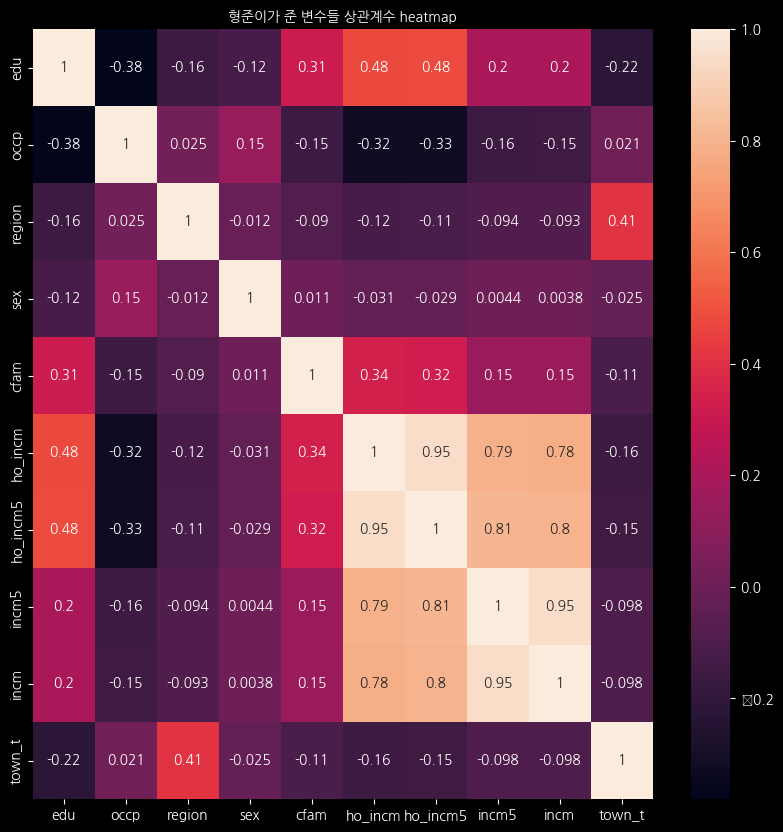

In [154]:



fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df_corr_, annot=True)



plt.title('형준이가 준 변수들 상관계수 heatmap', fontsize=10)
plt.show() 